In [90]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from itertools import product 

In [91]:
plt.rc('figure',autolayout=True)
plt.rc('image', cmap='magma')

## define the kernel 

In [93]:
kernel = tf.constant([[-1, -1, -1], 
                     [-1, 8, -1],
                     [-1, -1, -1],
                     ])

## load the image 

In [95]:
image = tf.io.read_file('Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300,300])

## plot the image 

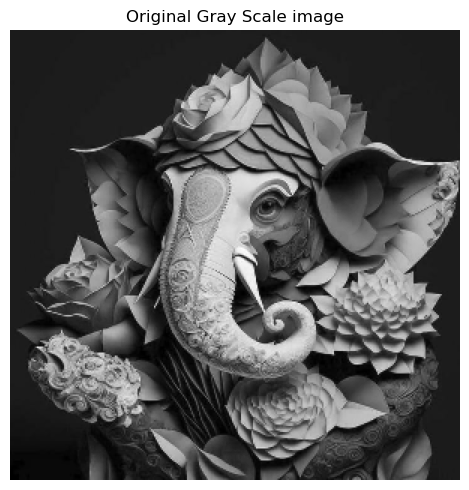

In [97]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()


## The current shape of kernel 

In [99]:
kernel.shape

TensorShape([3, 3])

## Reformat

In [101]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis = 0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32) 

## Convolution layer 

In [102]:
conv_fn = tf.nn.conv2d 
image_filter = conv_fn(input=image,filters=kernel, strides=1, padding="SAME")

## Plot the convoled image 

Text(0.5, 1.0, 'Convolution')

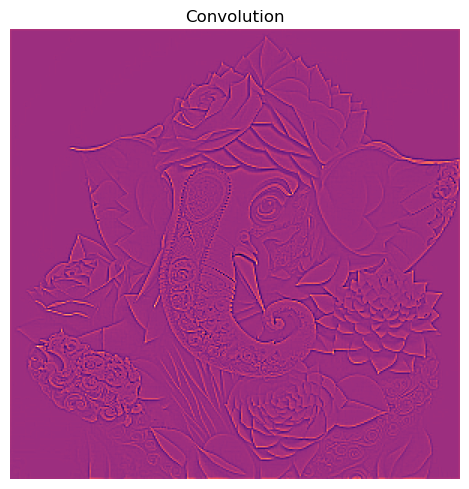

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

## Activation layer 

In [104]:
relu_fn = tf.nn.relu 

In [105]:
relu_fn

<function tensorflow.python.ops.gen_nn_ops.relu(features: Annotated[Any, ~TV_Relu_T], name=None) -> Annotated[Any, ~TV_Relu_T]>

## Image detection 

In [106]:
image_detect = relu_fn(image_filter)

Text(0.5, 1.0, 'Activation')

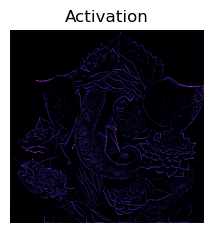

In [130]:
plt.subplot(1,3,2)
# reformat for plotting
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

## 

In [108]:
pool = tf.nn.pool
image_condense = pool(input=image_detect, 
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )


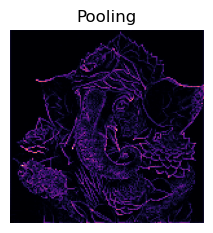

In [109]:
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()